# Data Preparation
<hr>
This notebook is used to prepare data for various modules.
<hr>


## Climate Data

In [ ]:
import numpy as np
import pandas as pd

# Get coordinates for data
points_file = "input/qilian.txt"
pts = pd.read_csv(points_file)

# Get unique lat/lon for row/col mapping
lats = np.sort(pts["Latitude"].unique())[::-1]  # north → south
lons = np.sort(pts["Longitude"].unique())       # west → east

print(lats[0])
print(lats[-1])
print(lons[0])
print(lons[-1])

# Map lat/lon to row/col
lat_to_row = {lat: i for i, lat in enumerate(lats)}
lon_to_col = {lon: j for j, lon in enumerate(lons)}

pts["row"] = pts["Latitude"].map(lat_to_row).astype(int)
pts["col"] = pts["Longitude"].map(lon_to_col).astype(int)

nrow, ncol = len(lats), len(lons)
ntime = 365  # for 1979

print(f"Grid size: {nrow} rows x {ncol} cols")

93.5574646000000030,35.8364334110000016 : 102.9709725940000027,39.8075498950000011

39.721391739
35.921391739
93.663346096
102.863346096
Grid size: 39 rows x 93 cols


In [72]:
import os

data_root = '/Volumes/thesisDrive/Climate data/Daily'
# === Config ===
variables = ["TempMax", "TempMin"]
years = range(1982, 2019)  # 1979-2018

# === Output folder for .npy files ===
output_folder = "../data_input/climate_numpy"
os.makedirs(output_folder, exist_ok=True)

# === Loop through each year ===
for year in years:
    print(f"Processing year {year}...")

    # Create a folder for this year
    year_folder = os.path.join(output_folder, str(year))
    os.makedirs(year_folder, exist_ok=True)
    
    # Initialize arrays for this year
    ntime = 366 if pd.Timestamp(year=year, month=12, day=31).is_leap_year else 365
    arrays = {var: np.zeros((nrow, ncol, ntime), dtype=np.float32) for var in variables}

    
    # Loop over each point/folder
    for idx, row in pts.iterrows():
        lat, lon = row["Latitude"], row["Longitude"]
        r, c = row["row"], row["col"]
        folder_name = f"{lon}_{lat}"
        file_path = os.path.join(data_root, folder_name, "Climate_data.txt")
        if not os.path.exists(file_path):
            folder_name = f" {lon}_{lat}"
            file_path = os.path.join(data_root, folder_name, "Climate_data.txt")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, sep="\t", parse_dates=["Date"])
            df_year = df[df["Date"].dt.year == year].reset_index(drop=True)
            
            # Fill arrays
            for var in variables:
                col_name = var
                r = int(r)
                c = int(c)  
                # Only fill up to the available number of days (in case leap year differences)
                arrays[var][r, c, :len(df_year)] = df_year[col_name].values

                values = df_year[col_name].values
            print(
                f"{var} @ (r={r}, c={c}), "
                f"lat={lat}, lon={lon}, "
                f"first 5 days: {values[:5]}"
            )

        else:
            print(f"Missing file: {file_path}")
    
    # Save arrays for this year in the year's folder
    for var, arr in arrays.items():
        npy_path = os.path.join(year_folder, f"{var}.npy")
        np.save(npy_path, arr)
        print(f"Saved {npy_path}")

print("All years processed!")


Processing year 1982...
Saved ../data_input/climate_numpy/1982/TempMax.npy
Saved ../data_input/climate_numpy/1982/TempMin.npy
Processing year 1983...
Saved ../data_input/climate_numpy/1983/TempMax.npy
Saved ../data_input/climate_numpy/1983/TempMin.npy
Processing year 1984...
Saved ../data_input/climate_numpy/1984/TempMax.npy
Saved ../data_input/climate_numpy/1984/TempMin.npy
Processing year 1985...
Saved ../data_input/climate_numpy/1985/TempMax.npy
Saved ../data_input/climate_numpy/1985/TempMin.npy
Processing year 1986...
Saved ../data_input/climate_numpy/1986/TempMax.npy
Saved ../data_input/climate_numpy/1986/TempMin.npy
Processing year 1987...
Saved ../data_input/climate_numpy/1987/TempMax.npy
Saved ../data_input/climate_numpy/1987/TempMin.npy
Processing year 1988...
Saved ../data_input/climate_numpy/1988/TempMax.npy
Saved ../data_input/climate_numpy/1988/TempMin.npy
Processing year 1989...
Saved ../data_input/climate_numpy/1989/TempMax.npy
Saved ../data_input/climate_numpy/1989/Temp

In [92]:
import os

data_root = '/Volumes/thesisDrive/Permafrost Data TP/daily/Climate data/daily'
# === Config ===
variables = ["Precip", "Radiation", "Wind"]
years = range(1979, 1980)  # 1979-2018

# === Output folder for .npy files ===
output_folder = "../data_input/climate_numpy"
os.makedirs(output_folder, exist_ok=True)

# === Loop through each year ===
for year in years:
    print(f"Processing year {year}...")

    # Create a folder for this year
    year_folder = os.path.join(output_folder, str(year))
    os.makedirs(year_folder, exist_ok=True)
    
    # Initialize arrays for this year
    ntime = 366 if pd.Timestamp(year=year, month=12, day=31).is_leap_year else 365
    arrays = {var: np.zeros((nrow, ncol, ntime), dtype=np.float32) for var in variables}
    
    # Loop over each point/folder
    for idx, row in pts.iterrows():
        lat, lon = row["Latitude"], row["Longitude"]
        r, c = row["row"], row["col"]
        folder_name = f"{lon}_{lat}"
        file_path = os.path.join(data_root, folder_name, "Climate_data.txt")
        
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, sep="\t", parse_dates=["Date"])
            df_year = df[df["Date"].dt.year == year].reset_index(drop=True)
            
            # Fill arrays
            for var in variables:
                col_name = var
                r = int(r)
                c = int(c)  
                # Only fill up to the available number of days (in case leap year differences)
                arrays[var][r, c, :len(df_year)] = df_year[col_name].values

                values = df_year[col_name].values
                print(
                f"{var} @ (r={r}, c={c}), "
                f"lat={lat}, lon={lon}, "
                f"first 5 days: {values[:5]}"
            )

        else:
            print(f"Missing file: {file_path}")
    
    # Save arrays for this year in the year's folder
    for var, arr in arrays.items():
        npy_path = os.path.join(year_folder, f"{var}.npy")
        np.save(npy_path, arr)
        print(f"Saved {npy_path}")

print("All years processed!")


Processing year 1979...
Precip @ (r=33, c=64), lat=36.421391739, lon=100.063346096, first 5 days: [0. 0. 0. 0. 0.]
Radiation @ (r=33, c=64), lat=36.421391739, lon=100.063346096, first 5 days: [107.21875 135.28125 134.875   137.0625  133.65625]
Wind @ (r=33, c=64), lat=36.421391739, lon=100.063346096, first 5 days: [2.47625 1.40375 2.425   1.14125 4.61125]
Precip @ (r=32, c=64), lat=36.521391739, lon=100.063346096, first 5 days: [0. 0. 0. 0. 0.]
Radiation @ (r=32, c=64), lat=36.521391739, lon=100.063346096, first 5 days: [106.6875  133.84375 133.375   135.59375 132.9375 ]
Wind @ (r=32, c=64), lat=36.521391739, lon=100.063346096, first 5 days: [2.6225  1.66    2.54375 1.385   4.67125]
Precip @ (r=31, c=64), lat=36.621391739, lon=100.063346096, first 5 days: [0. 0. 0. 0. 0.]
Radiation @ (r=31, c=64), lat=36.621391739, lon=100.063346096, first 5 days: [105.625   131.4375  131.03125 133.1875  131.21875]
Wind @ (r=31, c=64), lat=36.621391739, lon=100.063346096, first 5 days: [2.83    1.97625

(39, 93, 365)


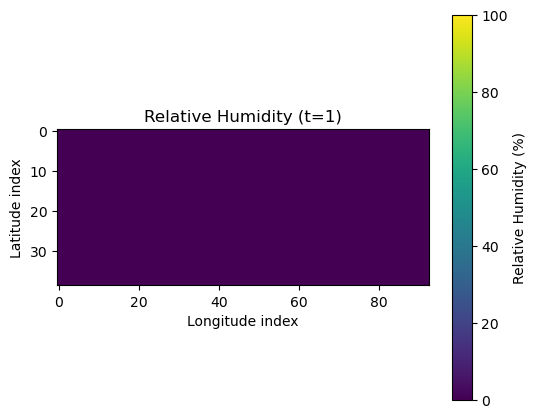

In [91]:

import matplotlib.pyplot as plt

t = 1 # time index

RH = np.load("../data_input/climate_numpy/1981/Precip.npy")
print(RH.shape)

plt.figure(figsize=(6, 5))
plt.imshow(
    RH[:, :, t],
    cmap="viridis",
    vmin=0,
    vmax=100,
)
plt.colorbar(label="Relative Humidity (%)")
plt.title(f"Relative Humidity (t={t})")
plt.xlabel("Longitude index")
plt.ylabel("Latitude index")
plt.show()



In [7]:
import numpy as np
import os

base_dir = "../data_input/climate_yearly"
variables = ["TempMax", "TempMin", "Wind", "Precip", "Radiation", "RH"]
periods = {
    "1979-1998": range(1979, 1999),
    "1999-2018": range(1999, 2019),
}

max_days = 365  # we know this

out_dir = "../data_input/climate_20yr_averages"
os.makedirs(out_dir, exist_ok=True)

period_daily_means = {}

for period_name, years in periods.items():
    print(f"Processing {period_name}...")
    period_daily_means[period_name] = {}

    for var in variables:
        daily_stack = []

        for year in years:
            path = os.path.join(base_dir, str(year), f"{var}.npy")
            arr = np.load(path)  # shape (nrow, ncol, ntime)
            nrow, ncol, ntime = arr.shape

            if ntime > max_days:
                idx_feb29 = 59
                arr = np.delete(arr, idx_feb29, axis=-1)

            daily_stack.append(arr)

        # Stack: (nyears, nrow, ncol, max_days)
        stacked = np.stack(daily_stack, axis=0)
        mean_daily = stacked.mean(axis=0)  # mean over years → (nrow, ncol, max_days)

        period_daily_means[period_name][var] = mean_daily

        # Save each variable
        out_path = os.path.join(out_dir, period_name, f"{var}.npy")
        os.makedirs(os.path.dirname(out_path), exist_ok=True)
        np.save(out_path, mean_daily)
        print(f"Saved {out_path} | shape: {mean_daily.shape}")



Processing 1979-1998...
Saved ../data_input/climate_20yr_averages/1979-1998/TempMax.npy | shape: (39, 93, 365)
Saved ../data_input/climate_20yr_averages/1979-1998/TempMin.npy | shape: (39, 93, 365)
Saved ../data_input/climate_20yr_averages/1979-1998/Wind.npy | shape: (39, 93, 365)
Saved ../data_input/climate_20yr_averages/1979-1998/Precip.npy | shape: (39, 93, 365)
Saved ../data_input/climate_20yr_averages/1979-1998/Radiation.npy | shape: (39, 93, 365)
Saved ../data_input/climate_20yr_averages/1979-1998/RH.npy | shape: (39, 93, 365)
Processing 1999-2018...
Saved ../data_input/climate_20yr_averages/1999-2018/TempMax.npy | shape: (39, 93, 365)
Saved ../data_input/climate_20yr_averages/1999-2018/TempMin.npy | shape: (39, 93, 365)
Saved ../data_input/climate_20yr_averages/1999-2018/Wind.npy | shape: (39, 93, 365)
Saved ../data_input/climate_20yr_averages/1999-2018/Precip.npy | shape: (39, 93, 365)
Saved ../data_input/climate_20yr_averages/1999-2018/Radiation.npy | shape: (39, 93, 365)
Save

In [112]:
import numpy as np
import rasterio
from rasterio.transform import from_origin

# Replace with your actual file path
arr = np.load("../data_input/climate_yearly/1979/RH.npy")  # shape: (rows, cols, time)

# --- Select the day you want ---
day_index = 0  # 0 = first day, 1 = second day, etc.
arr_day = arr[:, :, day_index]

# Grid georeferencing (upper-left corner of your grid)
x_min = 93.663346096
y_max = 39.721391739  # adjust to your actual coordinates
pixel_size = 0.1            # 0.1 degree


'''
39.721391739
35.921391739
93.663346096
102.863346096
'''

transform = from_origin(x_min, y_max, pixel_size, pixel_size)

# Output path
out_tif = "climate_day1.tif"

# Save single-band GeoTIFF
with rasterio.open(
    out_tif,
    'w',
    driver='GTiff',
    height=arr_day.shape[0],
    width=arr_day.shape[1],
    count=1,          # single band
    dtype=arr_day.dtype,
    crs="EPSG:4326",
    transform=transform
) as dst:
    dst.write(arr_day, 1)  # write to band 1

print(f"Saved {out_tif}")

Saved climate_day1.tif


## Elevation

(39, 93)


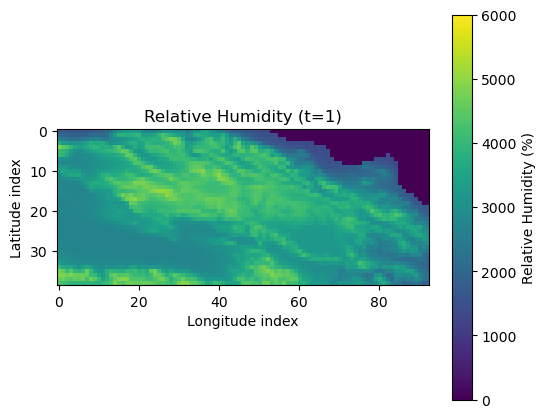

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal

## Loading the Raster file and save it as Numpy format
im_width = 93
im_height = 39

## Create numpy array for storing data
elevation = np.zeros((im_height, im_width))

## Writing the loop to read monthly data and store in NumPy array

elevation[:,:] = gdal.Open('/Volumes/thesisDrive/FAO GAEZ/elevation/reprojected elevation.tif').ReadAsArray()

## Save the NumPy array 
np.save('../data_input/terrain/elevation.npy', elevation)

RH = np.load("../data_input/terrain/elevation.npy")
print(RH.shape)

plt.figure(figsize=(6, 5))
plt.imshow(
    RH[:, :],
    cmap="viridis",
    vmin=0,
    vmax=6000,
)
plt.colorbar(label="Relative Humidity (%)")
plt.title(f"Relative Humidity (t={t})")
plt.xlabel("Longitude index")
plt.ylabel("Latitude index")
plt.show()